In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv('ins_fraud.csv')
data.head()

,fraud,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24
0,0,2,1,3,0,2,0,100,2,0,...,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,...,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,...,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,...,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,...,1209410,1,0,0,2,0,0,0,-1,0


In [3]:
data = data[data['c6']==0] # c6 법인이용 개인 고객 = 0 / 법인 = 1 / 법인 구성원 = 2
data = data[(data['c7']==0) | (data['c7']==40) | (data['c7']==100)] # c7 과실율 unique = 100,   0,  90,  55,  30,  80,  40,  10,  70,  20,  60,  85,  75, 50,  15,  65,  25
data = data[data['c12']!=5] # c12 대여기간 (2,3,4,5) : 1 / (6,7,8,9) : 2 / (10 =< x <=36) : 3 / (36+) : 4 / (0,1) : 5
data = data[(data['c19']==1) | (data['c19']==2) | (data['c19']==3)] # c19 수리 부위 갯수
data['c25'] = data['c15']-data['c14'] # c25 : 보험사 손해비용 - 차량수리비용

### Tomek’s link method

In [10]:
X = data.drop("fraud", 1)
y = data["fraud"]

In [18]:
from imblearn.under_sampling import TomekLinks
tom = TomekLinks()
X_tom, y_tom = tom.fit_resample(X, y)

In [19]:
len(X_tom), len(y_tom)

(391, 391)

In [20]:
from sklearn.model_selection import train_test_split
 
X = X_tom
y = y_tom
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

273
118
273
118


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

정확도 : 0.8898305084745762
precision 0.0
recall 0.0
f1 0.0


### Condensed Nearest Neighbour

In [22]:
X = data.drop("fraud", 1)
y = data["fraud"]

In [23]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(random_state=42)
X_cnn, y_cnn = cnn.fit_resample(X, y)

In [25]:
from sklearn.model_selection import train_test_split
 
X = X_cnn
y = y_cnn
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

299
129
299
129


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)

# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

정확도 : 0.8992248062015504
precision 0.0
recall 0.0
f1 0.0


### One Sided Selection

In [27]:
X = data.drop("fraud", 1)
y = data["fraud"]

In [28]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=0)
X_oss, y_oss = oss.fit_resample(X, y)

In [29]:
len(X_oss), len(y_oss)

(13601, 13601)

In [30]:
from sklearn.model_selection import train_test_split
 
X = X_oss
y = y_oss
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

9520
4081
9520
4081


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

정확도 : 0.9970595442293555
precision 0.0
recall 0.0
f1 0.0


### Edited Nearest Neighbours

In [32]:
X = data.drop("fraud", 1)
y = data["fraud"]

In [33]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(kind_sel="all", n_neighbors=5)
X_enn, y_enn = enn.fit_resample(X, y)

In [34]:
len(X_enn), len(y_enn)

(13743, 13743)

In [35]:
from sklearn.model_selection import train_test_split
 
X = X_enn
y = y_enn
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

9620
4123
9620
4123


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)

 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

정확도 : 0.9968469560999272
precision 0.0
recall 0.0
f1 0.0


### Neighbourhood Cleaning Rule

In [37]:
X = data.drop("fraud", 1)
y = data["fraud"]

In [38]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5)
X_ncr, y_ncr = ncr.fit_resample(X, y)

In [39]:
len(X_ncr), len(y_ncr)

(13731, 13731)

In [40]:
from sklearn.model_selection import train_test_split
 
X = X_ncr
y = y_ncr
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

9611
4120
9611
4120


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

정확도 : 0.9970873786407767
precision 0.0
recall 0.0
f1 0.0


## 복합 샘플링

- SMOTEENN: SMOTE + ENN
- SMOTETomek: SMOTE + Tomek

In [42]:
from imblearn.over_sampling import *

### SMOTEENN

In [43]:
X = data.drop("fraud", 1)
y = data["fraud"]

In [44]:
from imblearn.combine import *
stn = SMOTEENN(random_state=0)
X_stn, y_stn = stn.fit_resample(X, y)

In [45]:
len(X_stn), len(y_stn)

(17968, 17968)

In [46]:
from sklearn.model_selection import train_test_split
 
X = X_stn
y = y_stn
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

12577
5391
12577
5391


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

정확도 : 0.9977740678909294
precision 0.9985760056959773
recall 0.9971560611446854
f1 0.9978655282817502


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2574,    4],
       [   8, 2805]])

In [49]:
y = data["fraud"]

In [50]:
fraud = data.drop("fraud", 1)

In [51]:
y_pred = forest.predict(fraud)
confusion_matrix(y, y_pred)

array([[13864,    31],
       [   11,    30]])

In [52]:
print('정확도 :', metrics.accuracy_score(y, y_pred))

print('precision', metrics.precision_score(y, y_pred))

print('recall', metrics.recall_score(y, y_pred))

print('f1', metrics.f1_score(y, y_pred))

정확도 : 0.9969862227324914
precision 0.4918032786885246
recall 0.7317073170731707
f1 0.5882352941176471


### SMOTETomek

In [53]:
X = data.drop("fraud", 1)
y = data["fraud"]

In [54]:
from imblearn.combine import *
stt = SMOTETomek(random_state=4)
X_stt, y_stt = stt.fit_resample(X, y)

In [55]:
len(X_stt), len(y_stt)

(24662, 24662)

In [56]:
from sklearn.model_selection import train_test_split
 
X = X_stt
y = y_stt
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

17263
7399
17263
7399


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

정확도 : 0.9977023922151642
precision 0.9972994869025115
recall 0.9981081081081081
f1 0.997703633662029


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3689,   10],
       [   7, 3693]])

In [59]:
y = data["fraud"]

In [60]:
fraud = data.drop("fraud", 1)

In [61]:
y_pred = forest.predict(fraud)
confusion_matrix(y, y_pred)

array([[13879,    16],
       [   10,    31]])

In [62]:
print('정확도 :', metrics.accuracy_score(y, y_pred))

print('precision', metrics.precision_score(y, y_pred))

print('recall', metrics.recall_score(y, y_pred))

print('f1', metrics.f1_score(y, y_pred))

정확도 : 0.9981343283582089
precision 0.6595744680851063
recall 0.7560975609756098
f1 0.7045454545454545


# OVERSAMPLING

### SMOTE
- Synthetic Minority Oversampling Technique
- sudo pip install imbalanced-learn
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

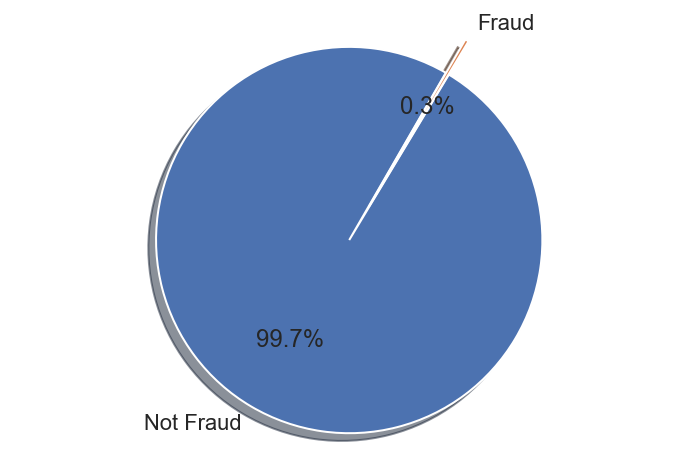

In [64]:
#visualizing in pie chart
labels = 'Not Fraud', 'Fraud'
explode = (0, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(data['fraud'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')
plt.show()

In [65]:
import imblearn 

In [66]:
print(imblearn.__version__)

0.8.0


In [67]:
from sklearn.model_selection import train_test_split

In [70]:
data["fraud"]

0        0
1        0
2        0
3        0
4        0
        ..
15994    0
15995    0
15996    0
15997    0
15998    0
Name: fraud, Length: 13936, dtype: int64

In [71]:
X = data.iloc[:,1:]
y = data["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

In [75]:
from collections import Counter

In [77]:
counter = Counter()

In [78]:
counter.items()

dict_items([])

### SMOTE

In [81]:
X = data.iloc[:,1:]
y = data["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

In [82]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [83]:
len(X_smote), len(y_smote)

(27790, 27790)

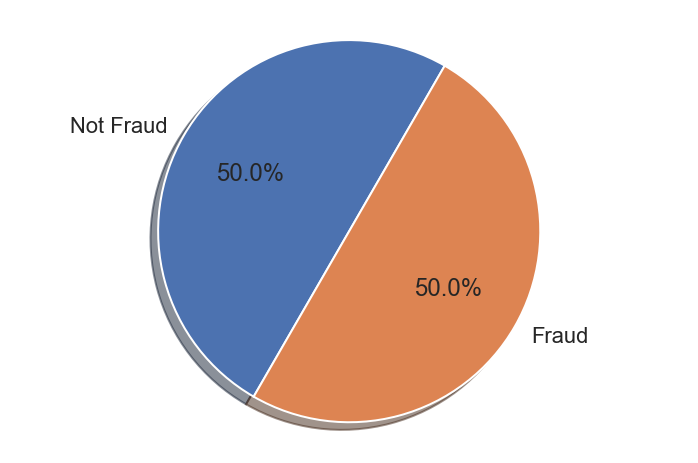

In [84]:
labels = 'Not Fraud', 'Fraud'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(y_smote.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')
plt.show()

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_smote, y_smote, test_size = 0.10, random_state = 31)

In [86]:
len(x_train), len(x_test), len(y_train), len(y_test)

(25011, 2779, 25011, 2779)

In [87]:
# applying logistic regression
from sklearn.linear_model import LogisticRegression
rfc = RandomForestClassifier(random_state = 4)
rfc.fit(x_train, y_train)
dd = rfc.score(x_test, y_test)
dd

0.9978409499820079

In [88]:
from sklearn.metrics import classification_report
y_preds = rfc.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1375
           1       1.00      1.00      1.00      1404

    accuracy                           1.00      2779
   macro avg       1.00      1.00      1.00      2779
weighted avg       1.00      1.00      1.00      2779



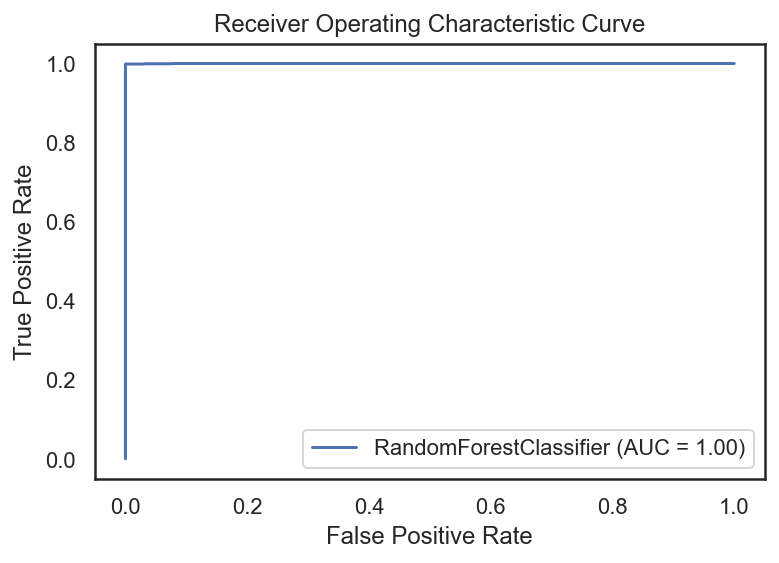

In [89]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

In [90]:
y_pred = rfc.predict(fraud)
confusion_matrix(y, y_pred)

array([[13889,     6],
       [    2,    39]])

In [91]:
#KNeighborsClassifier? 

In [92]:
X = data.iloc[:,1:]
y = data["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
sc = StandardScaler()
X_train = sc.fit_transform(X_smote)
X_test = sc.transform(X_test)

In [95]:
len(X_train), len(y_smote)

(27790, 27790)

In [96]:
X_train.shape, y_smote.shape

((27790, 25), (27790,))

In [102]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train, y_smote)

In [103]:
y_pred = classifier.predict(X_test)

In [104]:
from sklearn.metrics import recall_score
print(f'Recall Score is {recall_score(y_test, y_pred)}')

Recall Score is 0.7142857142857143


In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2781
           1       0.05      0.71      0.09         7

    accuracy                           0.96      2788
   macro avg       0.52      0.84      0.53      2788
weighted avg       1.00      0.96      0.98      2788



In [106]:
## applying other models
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []

models.append(("Random Forest Classifier: ", RandomForestClassifier()))
models.append(("Decision Tree Classifier: ", DecisionTreeClassifier()))
models.append(("AdaBoost Classifier: " , AdaBoostClassifier()))
models.append(("Gradient Boosting Classifier: ", GradientBoostingClassifier()))
models.append(("Logistic Regression: ", LogisticRegression()))

In [109]:
from sklearn.model_selection import KFold, cross_val_score


results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_test, y_smote,
                                cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    model = model.fit(X_train, y_smote)
    y_preds = model.predict(X_test)

    print(name, cv_results.mean(), cv_results.std())
    print(classification_report(y_test, y_preds)) 

ValueError: Found input variables with inconsistent numbers of samples: [2788, 27790]

### SMOTEENN

In [111]:
X = data.iloc[:,1:]
y = data["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

In [112]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=42)
X_somteenn, y_somteenn = sme.fit_resample(X, y)

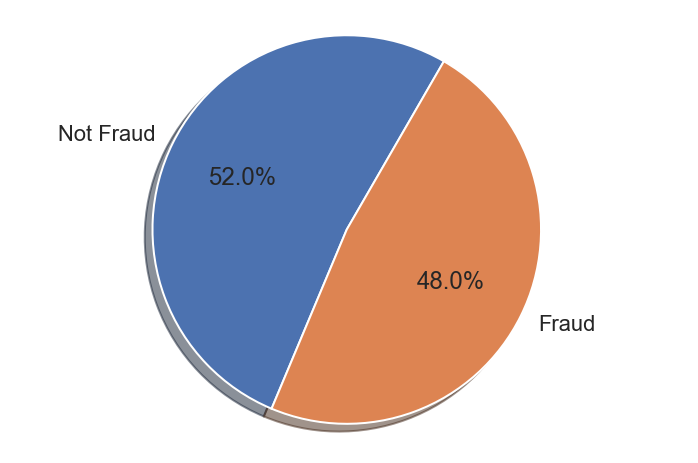

In [113]:
labels = 'Not Fraud', 'Fraud'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(y_somteenn.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')
plt.show()

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_somteenn, y_somteenn, test_size = 0.10, random_state = 31)

In [115]:
len(x_train), len(x_test), len(y_train), len(y_test)

(16047, 1783, 16047, 1783)

In [116]:
# applying logistic regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter = 1000, random_state = 4)
log_clf.fit(x_train, y_train)
log_score = log_clf.score(x_test, y_test)
log_score

0.5630959057767807

In [117]:
from sklearn.metrics import classification_report
y_preds = log_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.11      0.19       871
           1       0.54      1.00      0.70       912

    accuracy                           0.56      1783
   macro avg       0.77      0.55      0.45      1783
weighted avg       0.76      0.56      0.45      1783



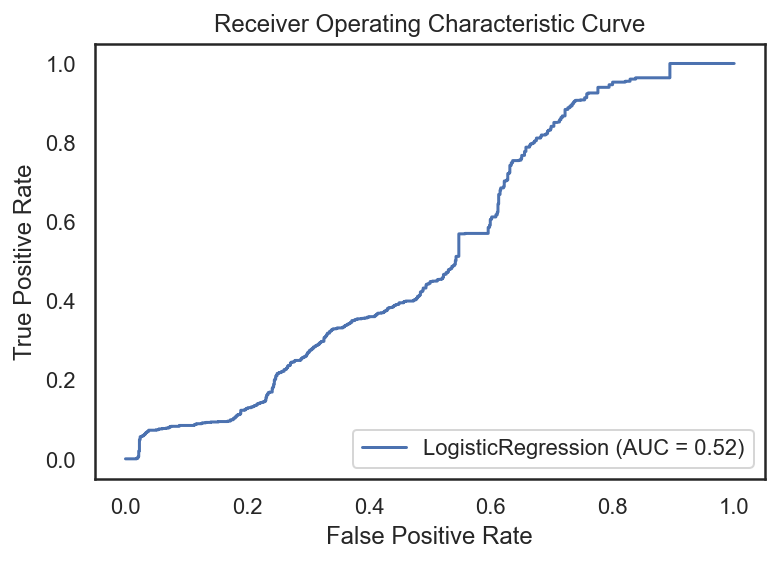

In [118]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_clf, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

In [119]:
## applying other models
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []

models.append(("Random Forest Classifier: ", RandomForestClassifier()))
models.append(("Decision Tree Classifier: ", DecisionTreeClassifier()))
models.append(("AdaBoost Classifier: " , AdaBoostClassifier()))
models.append(("Gradient Boosting Classifier: ", GradientBoostingClassifier()))
models.append(("Logistic Regression: ", LogisticRegression()))

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)
X = data.iloc[:,1:]
y = data["fraud"]

In [123]:
sme = SMOTEENN(random_state=42)
X_somteenn, y_somteenn = sme.fit_resample(X, y)

In [124]:
x_train,x_test,y_train,y_test = train_test_split(X_somteenn, y_somteenn, test_size = 0.10, random_state = 31)

In [125]:
from sklearn.model_selection import KFold, cross_val_score


results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, x_test, y_test,
                                cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    model = model.fit(x_train, y_train)
    y_preds = model.predict(x_test)

    print(name, cv_results.mean(), cv_results.std())
    print(classification_report(y_test, y_preds))    

Random Forest Classifier:  0.9882242784754351 0.005709807773826401
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       871
           1       1.00      1.00      1.00       912

    accuracy                           1.00      1783
   macro avg       1.00      1.00      1.00      1783
weighted avg       1.00      1.00      1.00      1783

Decision Tree Classifier:  0.9697069839171624 0.006765498087349965
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       871
           1       0.98      1.00      0.99       912

    accuracy                           0.99      1783
   macro avg       0.99      0.99      0.99      1783
weighted avg       0.99      0.99      0.99      1783

AdaBoost Classifier:  0.9304472350738047 0.010311442321668264
              precision    recall  f1-score   support

           0       0.96      0.92      0.93       871
           1       0.92      0.96      0.

In [ ]:
# Random Forest Classifier using SOTEENN

In [126]:
rfc = RandomForestClassifier(random_state = 4)
rfc.fit(x_train, y_train)
log_score = rfc.score(x_test, y_test)
y_preds = rfc.predict(x_test)
print(classification_report(y_test, y_preds))
log_score

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       871
           1       1.00      1.00      1.00       912

    accuracy                           1.00      1783
   macro avg       1.00      1.00      1.00      1783
weighted avg       1.00      1.00      1.00      1783



0.997195737521032

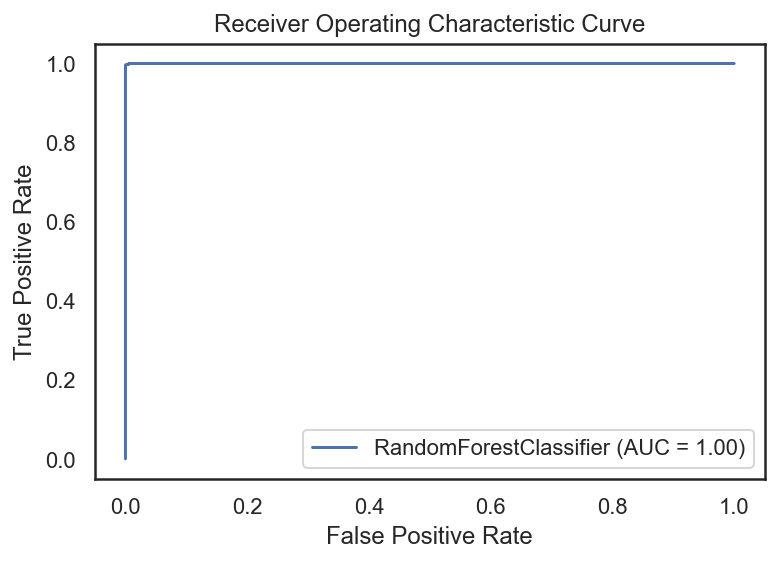

In [127]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
# 완벽...?  ㅜㅅㅜ 

In [130]:
# Logistic Classifier 
y_preds = rfc.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       871
           1       1.00      1.00      1.00       912

    accuracy                           1.00      1783
   macro avg       1.00      1.00      1.00      1783
weighted avg       1.00      1.00      1.00      1783



In [131]:
# 만들어보기 

In [132]:
# Gradient Boosting Classifier 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_clf = GradientBoostingClassifier(random_state=13)
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)

print('Acc : ', accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

Acc :  0.9702748177229389
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       871
           1       0.95      0.99      0.97       912

    accuracy                           0.97      1783
   macro avg       0.97      0.97      0.97      1783
weighted avg       0.97      0.97      0.97      1783



In [134]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimator=400)
evals = [(x_test, y_test)]
lgbm = lgbm.fit(x_train.values, y_train, early_stopping_rounds=100, eval_set=evals)

[1]	valid_0's binary_logloss: 0.622322
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.553787
[3]	valid_0's binary_logloss: 0.50388
[4]	valid_0's binary_logloss: 0.45395
[5]	valid_0's binary_logloss: 0.41808
[6]	valid_0's binary_logloss: 0.381165
[7]	valid_0's binary_logloss: 0.348629
[8]	valid_0's binary_logloss: 0.322594
[9]	valid_0's binary_logloss: 0.297483
[10]	valid_0's binary_logloss: 0.27744
[11]	valid_0's binary_logloss: 0.258115
[12]	valid_0's binary_logloss: 0.242526
[13]	valid_0's binary_logloss: 0.226817
[14]	valid_0's binary_logloss: 0.214606
[15]	valid_0's binary_logloss: 0.200886
[16]	valid_0's binary_logloss: 0.189434
[17]	valid_0's binary_logloss: 0.176308
[18]	valid_0's binary_logloss: 0.164759
[19]	valid_0's binary_logloss: 0.154336
[20]	valid_0's binary_logloss: 0.145376
[21]	valid_0's binary_logloss: 0.139288
[22]	valid_0's binary_logloss: 0.131898
[23]	valid_0's binary_logloss: 0.124955
[24]	valid_0's binary_logloss: 

### ADASYN(Adaptive Synthetic Sampling) 
#방법은 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 
#직선상에 가상의 소수 클래스 데이터를 만드는 방법이다.

In [135]:
from imblearn.over_sampling import ADASYN

In [137]:
X = data.iloc[:,1:]
y = data["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

In [138]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

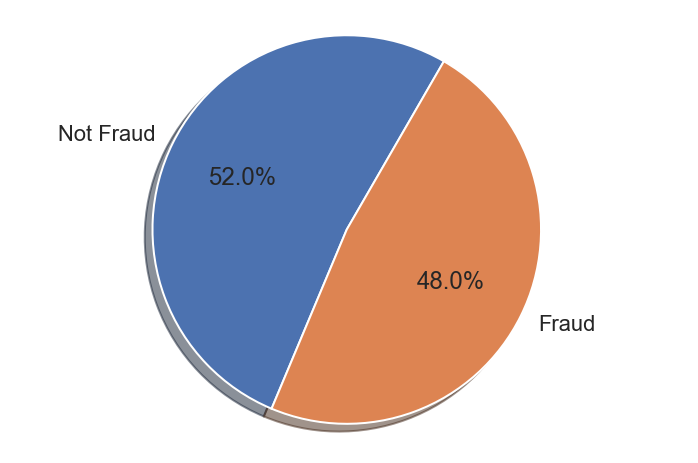

In [139]:
labels = 'Not Fraud', 'Fraud'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(y_somteenn.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')
plt.show()

In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_adasyn, y_adasyn, test_size = 0.10, random_state = 31)

In [141]:
len(x_train), len(x_test), len(y_train), len(y_test)

(25014, 2780, 25014, 2780)

In [142]:
# applying logistic regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter = 1000, random_state = 4)
log_clf.fit(x_train, y_train)
log_score = log_clf.score(x_test, y_test)
log_score

0.6280575539568345

In [143]:
from sklearn.metrics import classification_report
y_preds = log_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      1399
           1       0.62      0.64      0.63      1381

    accuracy                           0.63      2780
   macro avg       0.63      0.63      0.63      2780
weighted avg       0.63      0.63      0.63      2780



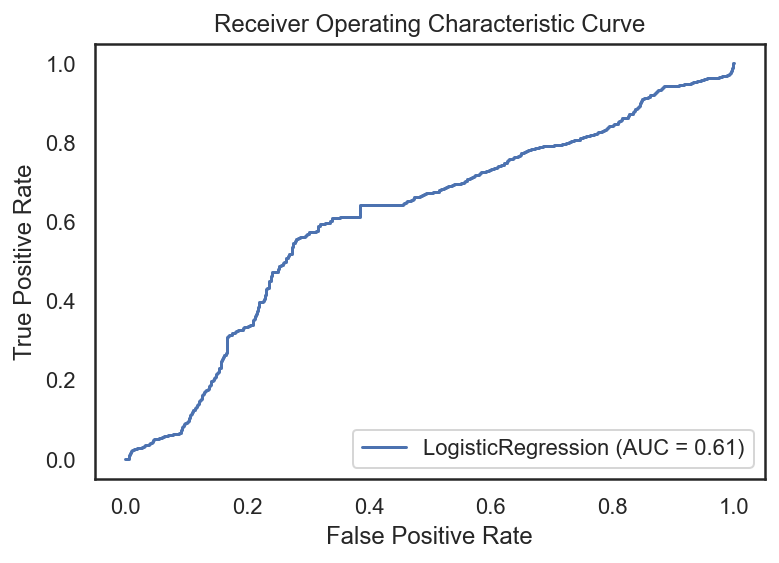

In [144]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_clf, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

In [145]:
## applying other models
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []

models.append(("Random Forest Classifier: ", RandomForestClassifier()))
models.append(("Decision Tree Classifier: ", DecisionTreeClassifier()))
models.append(("AdaBoost Classifier: " , AdaBoostClassifier()))
models.append(("Gradient Boosting Classifier: ", GradientBoostingClassifier()))
models.append(("Logistic Regression: ", LogisticRegression()))

In [146]:
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train,
                                cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    print(name, cv_results.mean(), cv_results.std())


Random Forest Classifier:  0.9976013512244514 0.00035750723811290414
Decision Tree Classifier:  0.9908451890081466 0.001234351397316759
AdaBoost Classifier:  0.903014280995577 0.003751734179027738
Gradient Boosting Classifier:  0.9610619873577653 0.0029393014413830335
Logistic Regression:  0.6190130304064663 0.006596190547645455
